In [25]:
import bmdrc 
import pandas as pd

## Module 1: Input Data Modules 

##### Binary Class

In [26]:
morpho_example_simple = pd.read_csv("/Users/degn400/Git_Repos/bmdrc/data/Binary_Simplified_Long.csv")

Long = bmdrc.input_data_classes.BinaryClass(
    df = morpho_example_simple,
    chemical = "chemical.id",
    plate = "plate.id",
    well = "well",
    concentration = "concentration",
    endpoint = "endpoint",
    value = "value",
    format = "long"
)

## Module 2: Pre-Processing Modules

#### Binary Class: Combine Endpoints

In [27]:
#endpoint_dict = {"ANY24":["MO24", "DP24", "SM24", "NC24"], 
#                 "ANY120":["MORT", "YSE_", "AXIS", "EYE_", "SNOU", "JAW_", "OTIC", "PE__", "BRAI", 
#                           "SOMI", "PFIN", "CFIN", "PIG_", "CIRC", "TRUN", "SWIM", "NC__", "TR__", 
#                           "MO24", "DP24", "SM24", "NC24"],
#                "TOT_MORT":["MO24","MORT"],
#                "ALL_BUT_MORT":["DP24","SM24","NC24", "YSE_", "AXIS", "EYE_", "SNOU", "JAW_", 
#                                "OTIC", "PE__", "BRAI", "SOMI", "PFIN", "CFIN", "PIG_", "CIRC",
#                                "TRUN", "SWIM", "NC__", "TR__"],
#                "BRN_": ["BRAI", "OTIC", "PFIN"],
#                "CRAN":["EYE_", "SNOU", "JAW_"],
#                "EDEM":["YSE", "PE__"],
#                "LTRK":["TRUN", "CFIN"],
#                "MUSC":["CIRC", "SWIM", "SOMI"],
#                "SKIN":["PIG_"],
#                "TCHR":["TR__"]}

endpoint_dict = {"ANY24":["MO24", "DP24", "SM24"], 
                 "ANY":["MO24", "DP24", "SM24", "JAW"]}

# Add new endpoint - twice
Long.combine_and_create_new_endpoints(endpoint_dict)
Long.combine_and_create_new_endpoints({"ANY24":["MO24", "DP24", "SM24", "NC24"]})

ANY24 is already an existing endpoint


#### Binary Class: Set wells to NA

In [28]:
#Long.set_well_to_na(endpoint_name = "MO24", endpoint_value = 1, except_endpoint = ["DP24", "MO24", "SM24", "MORT"])

Long.set_well_to_na(endpoint_name = "DNC", endpoint_value = 1, except_endpoint = ["ANY"])

# These should all be NA, except for ANY
Long.df[Long.df["bmdrc.Well.ID"].isin(["1 3.0 B 1", "1 6.0 A 1"])].iloc[:, :6]

,chemical.id,concentration,plate.id,well,endpoint,value
42,1,3.0,B,1,DP24,NaN
54,1,6.0,A,1,DP24,NaN
186,1,3.0,B,1,SM24,NaN
198,1,6.0,A,1,SM24,NaN
294,1,3.0,B,1,JAW,NaN
306,1,6.0,A,1,JAW,NaN
402,1,3.0,B,1,DNC,NaN
414,1,6.0,A,1,DNC,NaN
42,1,3.0,B,1,ANY24,NaN
54,1,6.0,A,1,ANY24,NaN


#### Binary Class: Remove Endpoint

In [29]:
# DNC should be removed
Long.remove_endpoints("DNC")

## Module 3: Filtering Modules

#### Negative Control Filter

In [ ]:
Long.filter_negative_control(percentage = 50, apply = False, diagnostic_plot = False)

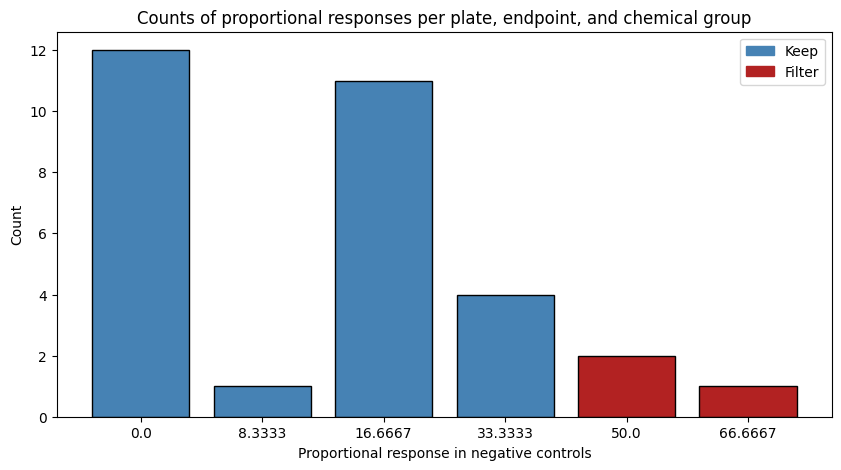

In [ ]:
Long.filter_negative_control_plot

In [ ]:
Long.filter_negative_control_df

,Response,Count,Filter
0,0.000000,12,Keep
1,8.333333,1,Keep
2,16.666667,11,Keep
3,33.333333,4,Keep
4,50.000000,2,Filter
5,66.666667,1,Filter


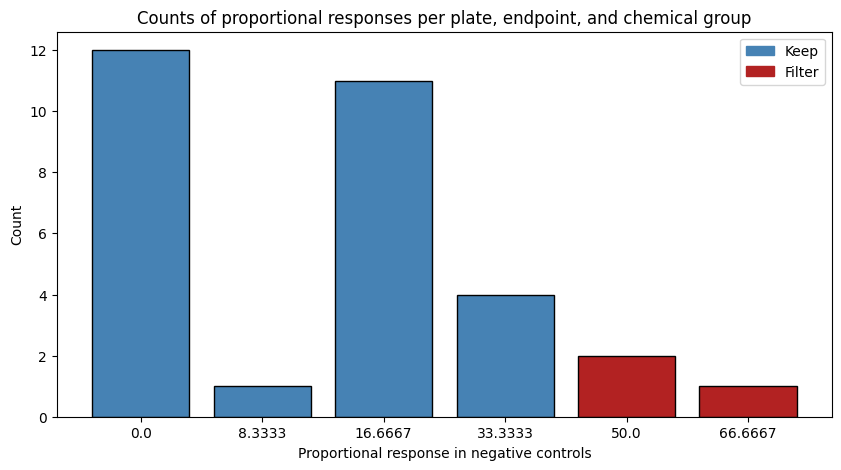

In [ ]:
# Apply the negative control filter
Long.filter_negative_control(percentage = 50, apply = True)

#### Minimum Concentration Filter

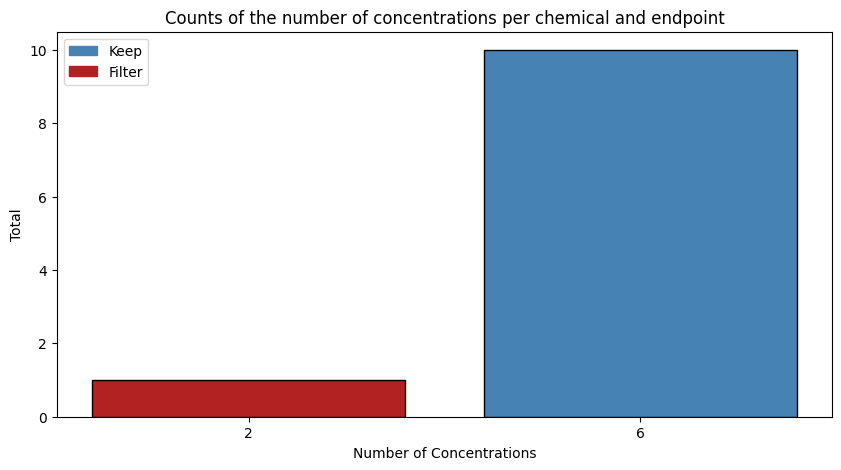

In [ ]:
Long.filter_min_concentration(apply = False, diagnostic_plot = True)

In [ ]:
Long.filter_min_concentration_df

,NumConc,Count,Filter
0,6,10,Keep
1,2,1,Filter


In [ ]:
Long.filter_min_concentration(apply = True)

#### Correlation Score Filter

In [ ]:
Long.filter_correlation_score(score = 0.2, diagnostic_plot = True)

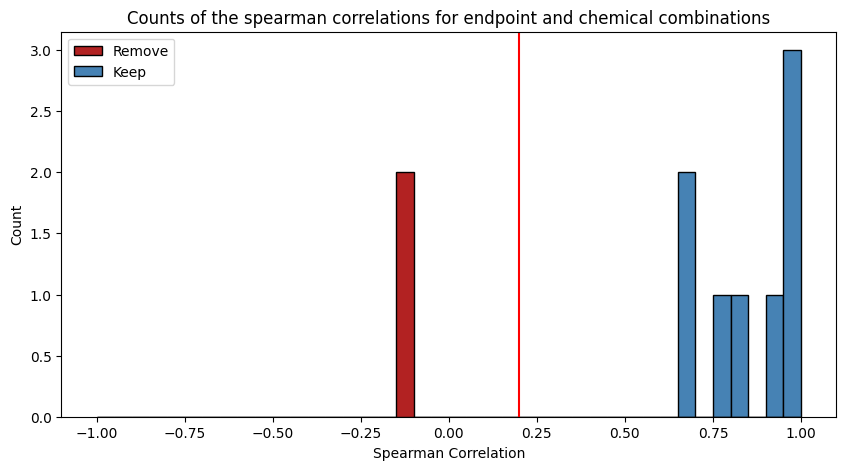

In [ ]:
Long.filter_correlation_score_plot

In [ ]:
Long.filter_correlation_score_df

,bmdrc.Endpoint.ID,Spearman,Filter
0,1 ANY,0.666737,Keep
1,1 ANY24,0.666737,Keep
2,1 DP24,0.971008,Keep
3,1 JAW,-0.142857,Remove
4,1 SM24,-0.115954,Remove
5,2 ANY,0.985611,Keep
6,2 ANY24,0.985611,Keep
7,2 DP24,0.942857,Keep
8,2 JAW,0.828571,Keep
9,2 SM24,0.753702,Keep


In [ ]:
Long.filter_correlation_score(score = 0.2, apply = True)

Filter suggestions: 
- Add a filter to remove a concentration if it doesn't have enough non-NA values 

## Module 4: Fit Models

In [ ]:
Long.fit_models(gof_threshold = 0.1, aic_threshold = 2, model_selection = "lowest BMDL")

In [ ]:
# Summary Statistics for filtered values 
Long.bmds_filtered

,bmdrc.Endpoint.ID,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm
0,1 JAW,NaN,NaN,NaN,NaN,10.85,0.0,24.0,0.452083
1,1 NC24,NaN,NaN,NaN,NaN,0.25,0.0,1.5,0.166667
2,1 SM24,NaN,NaN,NaN,NaN,13.40,0.0,24.0,0.558333


In [ ]:
Long.bmds

,bmdrc.Endpoint.ID,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm
0,1 ANY,Log Probit,0.000011,NaN,0.017991,19.125000,0.0,24.0,0.796875
1,1 ANY24,Log Probit,0.000021,NaN,0.024599,19.025000,0.0,24.0,0.792708
2,1 DP24,Weibull,1.798141,NaN,13.360780,10.475000,0.0,24.0,0.436458
3,2 ANY,Quantal Linear,2.982072,2.042621,19.618498,87.083333,0.0,100.0,0.870833
4,2 ANY24,Quantal Linear,2.982072,2.042621,19.618498,87.083333,0.0,100.0,0.870833
5,2 DP24,Log Logistic,6.321510,0.797269,72.392449,45.833333,0.0,100.0,0.458333
6,2 JAW,Log Probit,2.842871,2.390934,115.465467,66.250000,0.0,100.0,0.662500
7,2 SM24,Gamma,57.192487,24.330544,78.809252,49.583333,0.0,100.0,0.495833


## Module 5: Output Modules

#### Benchmark Dose

In [ ]:
Long.output_benchmark_dose()
response = Long.output_res_benchmark_dose
response

,Chemical_ID,End_Point,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm,DataQC_Flag,BMD_Analysis_Flag,BMD10_Flag,BMD50_Flag,bmdrc.Endpoint.ID
0,1,ANY,Log Probit,0.000011,NaN,0.017991,19.125000,0.0,24.0,0.796875,1,2,1,1,1 ANY
1,1,ANY24,Log Probit,0.000021,NaN,0.024599,19.025000,0.0,24.0,0.792708,1,2,1,1,1 ANY24
2,1,DP24,Weibull,1.798141,NaN,13.360780,10.475000,0.0,24.0,0.436458,1,2,1,1,1 DP24
3,2,ANY,Quantal Linear,2.982072,2.042621,19.618498,87.083333,0.0,100.0,0.870833,1,2,1,1,2 ANY
4,2,ANY24,Quantal Linear,2.982072,2.042621,19.618498,87.083333,0.0,100.0,0.870833,1,2,1,1,2 ANY24
5,2,DP24,Log Logistic,6.321510,0.797269,72.392449,45.833333,0.0,100.0,0.458333,1,2,1,1,2 DP24
7,2,SM24,Gamma,57.192487,24.330544,78.809252,49.583333,0.0,100.0,0.495833,1,2,1,1,2 SM24
6,2,JAW,Log Probit,2.842871,2.390934,115.465467,66.250000,0.0,100.0,0.662500,1,1,1,0,2 JAW
0,1,JAW,NaN,NaN,NaN,NaN,10.850000,0.0,24.0,0.452083,0,0,0,0,1 JAW
1,1,NC24,NaN,NaN,NaN,NaN,0.250000,0.0,1.5,0.166667,0,0,0,0,1 NC24


#### Model Fits

In [ ]:
import numpy as np

Long.p_value_df.replace(0, np.nan, inplace = True)

Long.p_value_df

,Logistic,Gamma,Weibull,Log Logistic,Probit,Log Probit,Multistage2,Quantal Linear,bmdrc.Endpoint.ID
0,0.999672,0.952962,1.000000,0.994574,1.000000,0.671334,1.000000,0.999840,1 ANY
1,0.999625,0.949753,1.000000,0.980660,1.000000,0.707346,1.000000,0.999808,1 ANY24
2,0.530946,0.411125,0.404720,0.302883,0.730981,0.276280,0.413134,0.251539,1 DP24
3,0.995756,0.934188,1.000000,0.337791,NaN,NaN,NaN,0.506268,2 ANY
4,0.995756,0.934188,1.000000,0.337791,NaN,NaN,NaN,0.506268,2 ANY24
5,0.875330,0.341951,0.322965,0.276100,0.999989,0.270076,0.999999,0.361097,2 DP24
6,0.857556,0.695214,0.685198,0.673304,0.999887,0.669159,0.860715,0.759317,2 JAW
7,0.774814,0.567656,0.749483,0.347094,0.781150,0.347309,0.785259,0.938041,2 SM24


In [ ]:
Long.aic_df

,Logistic,Gamma,Weibull,Log Logistic,Probit,Log Probit,Multistage2,Quantal Linear,bmdrc.Endpoint.ID
0,77.632543,67.519436,NaN,68.392880,129.431126,63.302153,NaN,75.749863,1 ANY
1,76.855413,65.448837,NaN,68.457571,126.526706,62.958403,NaN,74.932544,1 ANY24
2,86.471958,86.862896,86.841449,86.361957,87.879481,86.250852,86.866241,84.866240,1 DP24
3,103.456849,97.664892,NaN,89.307264,NaN,NaN,NaN,89.975839,2 ANY
4,103.456849,97.664892,NaN,89.307264,NaN,NaN,NaN,89.975839,2 ANY24
5,125.709901,121.733128,121.653766,121.457702,138.795561,121.437530,142.238967,120.600536,2 DP24
6,137.328336,135.908417,135.828771,135.736550,150.061355,135.705915,137.772865,135.772821,2 JAW
7,108.071025,107.131519,108.745261,105.933951,108.082124,105.934963,109.040748,112.185783,2 SM24


In [ ]:
Long.bmdls_df

,Logistic,Gamma,Weibull,Log Logistic,Probit,Log Probit,Multistage2,Quantal Linear,bmdrc.Endpoint.ID
0,0.836095,NaN,0.550000,NaN,NaN,NaN,NaN,0.457716,1 ANY
1,0.843053,0.000076,0.550000,NaN,NaN,NaN,NaN,0.460179,1 ANY24
2,2.883928,NaN,0.184012,0.355818,2.702677,NaN,1.955967,1.304424,1 DP24
3,3.029032,NaN,0.550000,7.262204,0.000000,0.000000,NaN,2.042621,2 ANY
4,3.029032,NaN,0.550000,7.262204,0.000000,0.000000,NaN,2.042621,2 ANY24
5,19.985842,NaN,NaN,0.797269,13.805274,NaN,5.189281,7.982673,2 DP24
6,18.982997,NaN,NaN,NaN,13.099766,2.390934,14.577799,9.696806,2 JAW
7,13.718414,24.330544,15.075554,51.680453,13.115241,65.310932,21.803398,6.399155,2 SM24


In [33]:
Long.make_plate_groups

<bound method DataClass.make_plate_groups of <bmdrc.input_data_classes.BinaryClass.BinaryClass object at 0x306e44890>>

## Benchmark Dose Curves

In [34]:
Long.response_curve(chemical_name = 1, endpoint_name = "NC24", model = "quantal linear")

AttributeError: 'BinaryClass' object has no attribute 'plate_groups'

In [35]:
Long.report(out_folder = "/Users/degn400/Downloads/bmdrc_simple_example")

AttributeError: 'BinaryClass' object has no attribute 'plate_groups'

In [36]:
dose = [0, 0, 1.5, 1.5, 3, 3, 6, 6, 12, 12, 24, 24]
frac_affected = [0.16666667, 0.16666667, 0.83333333, 0.83333333, 0.66666667, 0.83333333, 0.83333333, 1, 1, 1, 0.83333333, 0.83333333]

In [37]:
import numpy as np

np.append(np.ones([len(dose[1:]),1]),np.log(np.reshape(dose[1:],(len(dose[1:]),1))),1)

array([[1.        ,       -inf],
       [1.        , 0.40546511],
       [1.        , 0.40546511],
       [1.        , 1.09861229],
       [1.        , 1.09861229],
       [1.        , 1.79175947],
       [1.        , 1.79175947],
       [1.        , 2.48490665],
       [1.        , 2.48490665],
       [1.        , 3.17805383],
       [1.        , 3.17805383]])

In [38]:
sub_data = pd.read_csv("~/Downloads/subdata_example.csv")

sub_data = sub_data[[Long.concentration, "bmdrc.num.tot", "bmdrc.num.affected", "bmdrc.num.nonna"]].groupby(Long.concentration).sum().reset_index()

sub_data

,concentration,bmdrc.num.tot,bmdrc.num.affected,bmdrc.num.nonna
0,0.0,12,2.0,12
1,1.5,12,10.0,12
2,3.0,12,9.0,12
3,6.0,12,11.0,12
4,12.0,12,12.0,12
5,24.0,12,10.0,12
